# Description

## \# Data Scraping \#  

### Get stock price last 180 days
    
    EX. PTT
    Data Source: www.settrade.com
    Link: https://www.settrade.com/C04_02_stock_historical_p1.jsp?txtSymbol=PTT&selectPage=2&max=180&offset=0
    
### return DataFrame

In [33]:
# stock-table.py

# https://www.settrade.com/C04_02_stock_historical_p1.jsp?txtSymbol=PTT&selectPage=2&max=180&offset=0

from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd

def HistoralStock(CODE, days=180):

    url = "https://www.settrade.com/"
    
    post_url = ("C04_02_stock_historical_p1.jsp?txtSymbol={}&selectPage=2&max={}&offset=0"
               .format(CODE, days))
    
    print("\nSource: {}".format(url+post_url))
    
    # Open url
    webopen = urlopen(url+post_url)
    
    # Read html data with bs4
    data = BeautifulSoup(webopen.read(), 'html.parser')
    
    # Close
    webopen.close()
    
    # Create dict of result
    result = {"Date":[], "open":[], "max":[], "min":[], "average":[], "close":[],
          "chg":[], "%chg":[], "vol(k)":[], "val(m)":[], "set_index":[], "set_%chg":[]}
    
    # Get keys from result dict
    result_keys = list(result.keys())
    
    # Get elements from table named: table table-info table-hover
    for elem in (data
                 .find('table',{'class':'table table-info table-hover'})
                 .find_all("tr")[1:]):

        for i in range(0, len(elem.find_all("td"))):

            val = elem.find_all("td")[i].text

            if i == 0:
                # Convert Date value format
                val = datetime.strptime(val, '%d/%m/%y').date()
            else:
                # Convert values to float and remove separated commas
                val = float(str(val).replace(",", ""))

            result[result_keys[i]].append(val)

    # Create output DataFrame
    result = ((pd.DataFrame(result))
              .sort_values(by="Date", ascending=True)
              .reset_index(drop=True))
    
    return data, result



Source: https://www.settrade.com/C04_02_stock_historical_p1.jsp?txtSymbol=OR&selectPage=2&max=180&offset=0

Data from  2021-10-20  To  2022-04-18


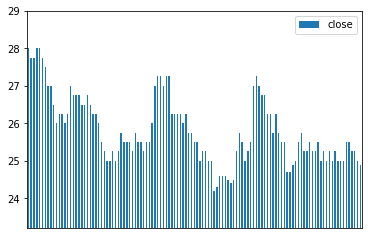

In [32]:
import matplotlib.pyplot as plt

stock = "OR"

data, result = HistoralStock(stock, days=180)

print("\nData from ", result.Date.min(), " To ", result.Date.max())

ax = result.plot(x="Date",
                 y="close",
                 ylim=[result.close.min()-1, result.close.max()+1],
                 kind="bar")

ax.get_xaxis().set_visible(False)

In [20]:
result

,Date,open,max,min,average,close,chg,%chg,vol(k),val(m),set_index,set_%chg
0,2021-10-20,7.30,7.40,7.25,7.33,7.40,0.10,1.37,474.23,3.48,1637.55,0.44
1,2021-10-21,7.40,7.45,7.35,7.42,7.45,0.05,0.68,506.32,3.76,1643.42,0.36
2,2021-10-25,7.50,7.50,7.40,7.46,7.45,0.00,0.00,284.06,2.12,1634.20,-0.56
3,2021-10-26,7.45,7.45,7.35,7.40,7.45,0.00,0.00,226.70,1.68,1635.97,0.11
4,2021-10-27,7.45,7.45,7.35,7.41,7.40,-0.05,-0.67,277.89,2.06,1627.61,-0.51
...,...,...,...,...,...,...,...,...,...,...,...,...
114,2022-04-07,7.60,7.70,7.55,7.62,7.65,-0.05,-0.65,447.72,3.41,1682.41,-1.10
115,2022-04-08,7.65,7.70,7.50,7.56,7.65,0.00,0.00,618.66,4.68,1686.00,0.21
116,2022-04-11,7.65,7.65,7.55,7.61,7.60,-0.05,-0.65,129.34,0.98,1678.46,-0.45
117,2022-04-12,7.60,7.60,7.50,7.56,7.55,-0.05,-0.66,431.64,3.26,1674.34,-0.25
